In [4]:
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Data

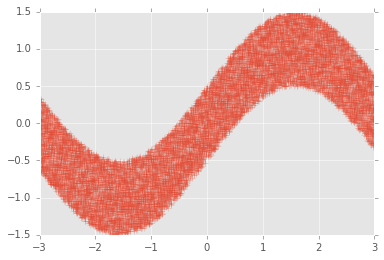

In [5]:
n_observations = 10000
xs = np.linspace(-3,3,n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5,0.5,n_observations)
plt.plot(xs,ys, marker='+',alpha=0.4)

## Cost

(array([   2.,   11.,   68.,  139.,  247.,  226.,  175.,   85.,   37.,   10.]),
 array([-0.33365461, -0.26883425, -0.20401388, -0.13919351, -0.07437314,
        -0.00955278,  0.05526759,  0.12008796,  0.18490832,  0.24972869,
         0.31454906]),
 <a list of 10 Patch objects>)

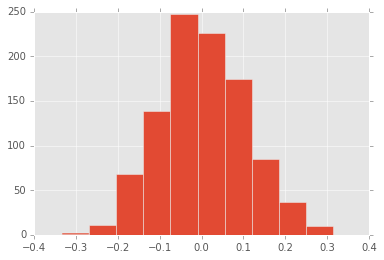

In [7]:
sess = tf.Session()
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')
n = tf.random_normal([1000],stddev=0.1).eval(session=sess)
plt.hist(n)

In [8]:
W = tf.Variable(tf.random_normal([1], dtype=tf.float32, stddev=0.1), name='weight')
B = tf.Variable(tf.constant([0], dtype=tf.float32), name='bias')
Y_pred = X * W + B

In [9]:
cost = tf.abs(Y_pred - Y)
# sum over all samples (similar to np.mean)
cost = tf.reduce_mean(cost)

## Training

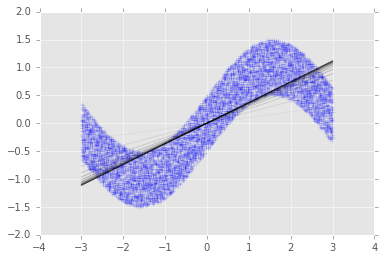

In [13]:
sess = tf.InteractiveSession()

# Plot the true data distribution
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha=0.15, marker='+')

# with tf.Session() as sess:
# we already have an interactive session open

# init all the variables in the graph
# This will set `W` and `b` to their initial random normal value.
sess.run(tf.global_variables_initializer())

# We now run a loop over epochs
prev_training_cost = 0.0
n_iterations = 500
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

for it_i in range(n_iterations):
    sess.run(optimizer, feed_dict={X: xs, Y: ys})
    training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

    # every 10 iterations
    if it_i % 10 == 0:
        # let's plot the x versus the predicted y
        ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)

        # We'll draw points as a scatter plot just like before
        # Except we'll also scale the alpha value so that it gets
        # darker as the iterations get closer to the end
        ax.plot(xs, ys_pred, 'k', alpha=float(it_i) / (n_iterations/2.))
        fig.show()
        plt.draw()

        # And let's print our training cost: mean of absolute differences
#             print(training_cost)

    # Allow the training to quit if we've reached a minimum
    if np.abs(prev_training_cost - training_cost) < 0.000001:
        break

    # Keep track of the training cost
    prev_training_cost = training_cost


## Stochastic/minibatch gradient descent

In [15]:
idxs = np.arange(100)
rand_idxs = np.random.permutation(idxs)
batch_size = 10
n_batches = len(rand_idxs) // batch_size
print('# of batches:', n_batches)

('# of batches:', 10)


In [17]:
def distance(p1, p2):
    return tf.abs(p1 - p2)

def train(X, Y, Y_pred, n_iterations=100, batch_size=200, learning_rate=0.02):
    cost = tf.reduce_mean(distance(Y_pred, Y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    fig, ax = plt.subplots(1, 1)
    ax.scatter(xs, ys, alpha=0.15, marker='+')
    ax.set_xlim([-4, 4])
    ax.set_ylim([-2, 2])
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        # We now run a loop over epochs
        prev_training_cost = 0.0
        for it_i in range(n_iterations):
            idxs = np.random.permutation(range(len(xs)))
            n_batches = len(idxs) // batch_size
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
                sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

            training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

            if it_i % 10 == 0:
                ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
                ax.plot(xs, ys_pred, 'k', alpha=it_i / float(n_iterations))
                print(training_cost)
    fig.show()
    plt.draw()

0.697558
0.488421
0.376293
0.621024
0.524434
0.300169
0.646549
0.437128
0.295415
0.587943


0.487767

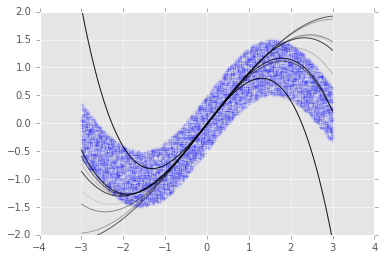

In [18]:
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for pow_i in range(0, 4):
    W = tf.Variable(
        tf.random_normal([1], stddev=0.1), name='weight_%d' % pow_i)
    Y_pred = tf.add(tf.mul(tf.pow(X, pow_i), W), Y_pred)

# And then we'll retrain with our new Y_pred
train(X, Y, Y_pred)
0.487767

In [19]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
g = tf.get_default_graph()
sess = tf.InteractiveSession()

n_observations = 10000
xs = np.linspace(-3,3,n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5,0.5,n_observations)

X = tf.placeholder(tf.float32, shape=[1, None], name='X')
Y = tf.placeholder(tf.float32, shape=[1, None], name='Y')

W = tf.Variable(tf.random_normal([1], dtype=tf.float32, stddev=0.1), name='weight')
B = tf.Variable(tf.constant([0], dtype=tf.float32), name='bias')
Y_pred = X * W + B

def linear(X, n_input, n_output, activation=None, scope=None):
    with tf.variable_scope(scope or "linear"):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1))
        b = tf.get_variable(
            name='b',
            shape=[n_output],
            initializer=tf.constant_initializer())
        h = tf.matmul(X, W) + b
        if activation is not None:
            h = activation(h)
        return h


# h = linear(X, 2, 10, scope='layer1')
# h2 = linear(h, 10, 10, scope='layer2')
# h3 = linear(h2, 10, 3, scope='layer3')
# [op.name for op in tf.get_default_graph().get_operations()]

# train on previous example
simple = linear(X,1,1)

def distance(p1, p2):
    return tf.abs(p1 - p2)


In [21]:
n_iterations = 100
batch_size = 10
cost = tf.reduce_mean(tf.reduce_sum(distance(Y_pred, Y), 1))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)
# # optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
sess.run(tf.global_variables_initializer())
# # We now run a loop over epochs
prev_training_cost = 0.0
for it_i in range(n_iterations):
    idxs = np.random.permutation(range(len(xs)))
    n_batches = len(idxs) // batch_size
    for batch_i in range(n_batches):
        idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
        sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

#     training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})
#     print(it_i, training_cost)

ValueError: Cannot feed value of shape (10,) for Tensor u'X:0', which has shape '(1, ?)'

In [120]:
def train2(X, Y, Y_pred, n_iterations=100, batch_size=50, learning_rate=0.02):
#     n_iterations = 500
#     batch_size = 50
    cost = tf.reduce_mean(tf.reduce_sum(distance(Y_pred, Y), 1))
    optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)
    # optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    sess.run(tf.global_variables_initializer())
    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})
        print(it_i, training_cost)

    #     if (it_i + 1) % 20 == 0:
    #         ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
    #         fig, ax = plt.subplots(1, 1)
    # #         img = np.clip(ys_pred.reshape(img.shape), 0, 255).astype(np.uint8)
    #         plt.imshow(img)
    #         plt.show()

train2(X, Y, Y_pred)

ValueError: Cannot feed value of shape (50,) for Tensor u'X:0', which has shape '(1, ?)'